# Import Libraries

In [3]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter


# Read Dataset

In [4]:
df = pd.read_csv('digital_marketing_campaign_dataset.csv')
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


# Dataset Basic Information

In [5]:
df.info()
print("\nDuplicate Rows:", df.duplicated().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [6]:
df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

# EDA

# Summary Statistics for Numerical Variables

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


# Summary Statistics for Categorical Variables

In [8]:
df.describe(include='object')

,Gender,CampaignChannel,CampaignType,AdvertisingPlatform,AdvertisingTool
count,8000,8000,8000,8000,8000
unique,2,5,4,1,1
top,Female,Referral,Conversion,IsConfid,ToolConfid
freq,4839,1719,2077,8000,8000


# Conversion Rate Distribution

C:\Users\Steven\AppData\Local\Temp\ipykernel_16440\1565727227.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Conversion'], palette="pastel")


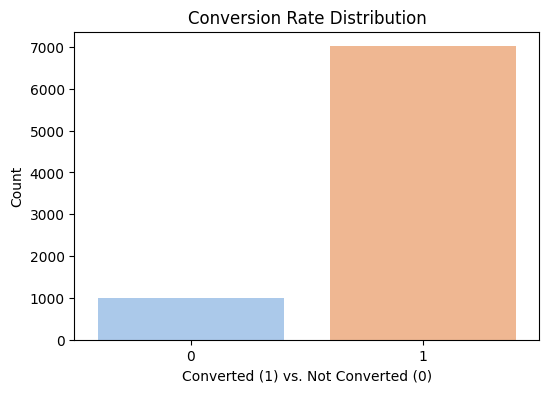

Conversion Distribution:
Conversion
1    7012
0     988
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Conversion'], palette="pastel")
plt.title("Conversion Rate Distribution")
plt.xlabel("Converted (1) vs. Not Converted (0)")
plt.ylabel("Count")
plt.show()

print("Conversion Distribution:")
print(df['Conversion'].value_counts())

df_majority = df[df['Conversion'] == 1]
df_minority = df[df['Conversion'] == 0]

# Feature Distributions

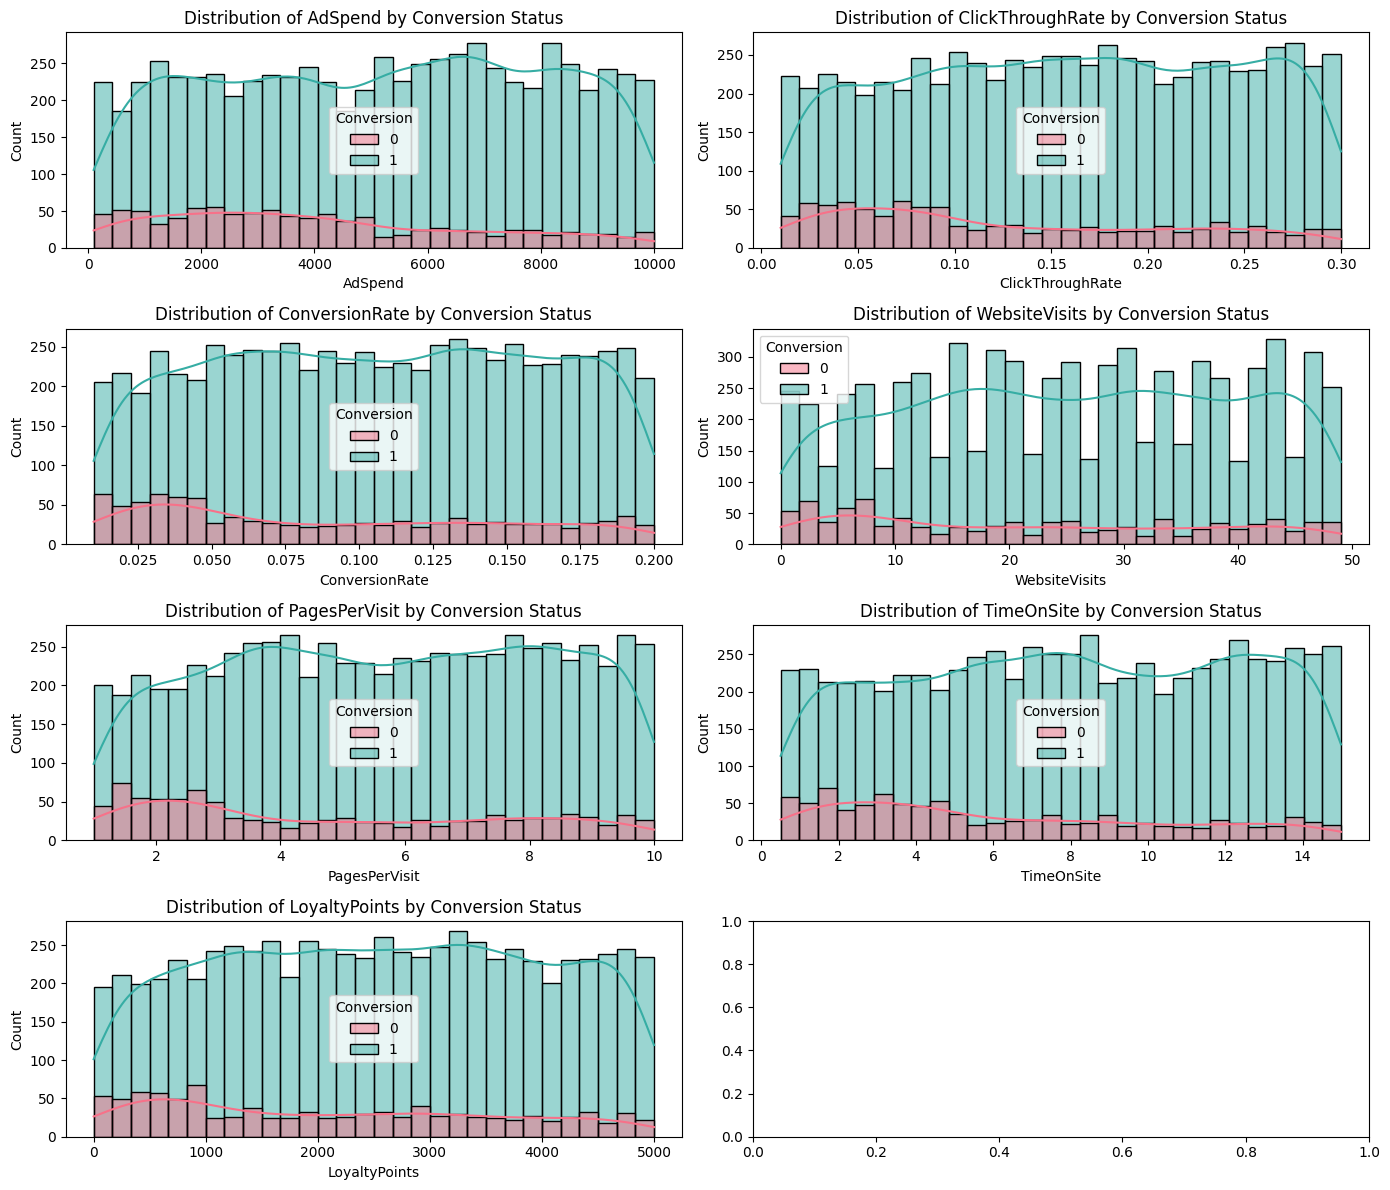

In [10]:
numeric_features = ["AdSpend", "ClickThroughRate", "ConversionRate", "WebsiteVisits",
                    "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, hue="Conversion", kde=True, bins=30, ax=axes[i], palette="husl")
    axes[i].set_title(f"Distribution of {feature} by Conversion Status")

plt.tight_layout()
plt.show()


# Preparing Data

In [11]:
df.drop(columns=["CustomerID", "AdvertisingPlatform", "AdvertisingTool"], inplace=True)

categorical_columns = ["Gender", "CampaignChannel", "CampaignType"]
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
numerical_columns = ["Age", "Income", "AdSpend", "ClickThroughRate", "ConversionRate", 
                     "WebsiteVisits", "PagesPerVisit", "TimeOnSite", "SocialShares", 
                     "EmailOpens", "EmailClicks", "PreviousPurchases", "LoyaltyPoints"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df.drop(columns=["Conversion"])
y = df["Conversion"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_smote))
print("Training set size after SMOTE:", X_train_smote.shape)
print("Testing set size:", X_test.shape)

c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Class distribution after SMOTE: Counter({1: 5610, 0: 5610})
Training set size after SMOTE: (11220, 16)
Testing set size: (1600, 16)


# Random Forest


Random Forest Results 
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8975

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.39      0.48       198
           1       0.92      0.97      0.94      1402

    accuracy                           0.90      1600
   macro avg       0.78      0.68      0.71      1600
weighted avg       0.88      0.90      0.89      1600



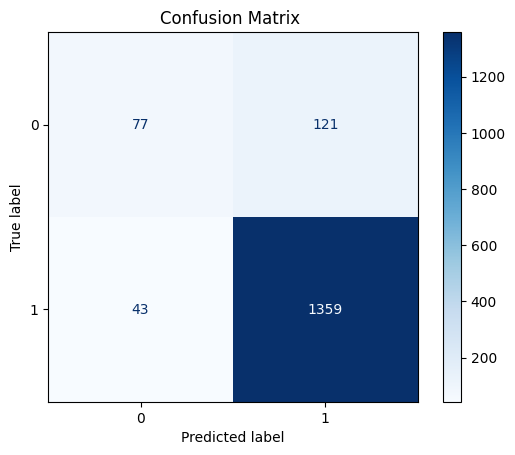

In [12]:
rf = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train_smote, y_train_smote)

best_rf = rf_grid.best_estimator_
rf_predictions_smote = best_rf.predict(X_test)

print("\nRandom Forest Results ")
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_predictions_smote))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions_smote))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix ")
plt.show()


# Save Model RF1

In [13]:
joblib.dump(best_rf, "random_forest_model1.pkl")

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


# Random Forest 2


Optimized Random Forest Results
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.898125

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.41      0.50       198
           1       0.92      0.97      0.94      1402

    accuracy                           0.90      1600
   macro avg       0.78      0.69      0.72      1600
weighted avg       0.89      0.90      0.89      1600



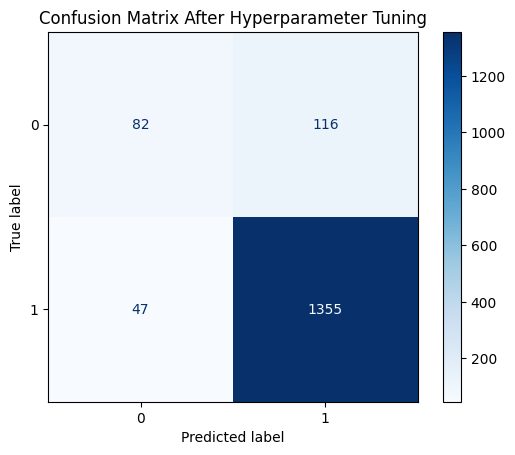

In [14]:
rf = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [100, 200, 300],  
    "max_depth": [10, 20, None], 
    "min_samples_split": [2, 5, 10],  
    "class_weight": [None, "balanced", "balanced_subsample"]  
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train_smote, y_train_smote)

best_rf = rf_grid.best_estimator_
rf_predictions_tuned = best_rf.predict(X_test)

print("\nOptimized Random Forest Results")
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, rf_predictions_tuned))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions_tuned))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix After Hyperparameter Tuning")
plt.show()


# Conclusion
Terdapat peningkatan pada Model tuning ke 2 pada recall, Macro Avg Recall and F1-score

# Save model RF2

In [15]:
joblib.dump(best_rf, "random_forest_model2.pkl")

print("Random Forest model saved successfully!")

Random Forest model saved successfully!


# XGBoost

c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:38:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Optimized XGBoost Results
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1}
Accuracy: 0.909375

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.40      0.52       198
           1       0.92      0.98      0.95      1402

    accuracy                           0.91      1600
   macro avg       0.84      0.69      0.74      1600
weighted avg       0.90      0.91      0.90      1600



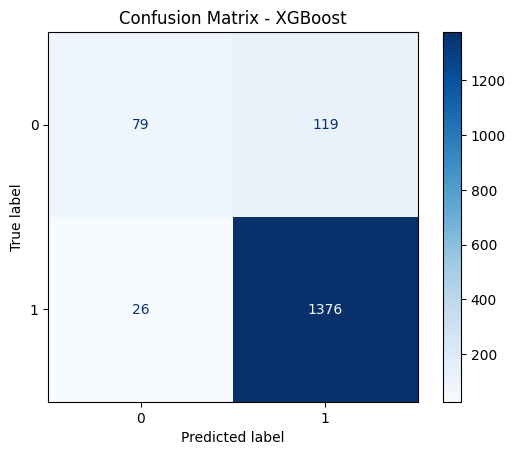

In [ ]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

xgb_params = {
    "n_estimators": [100, 200, 300],  
    "learning_rate": [0.01, 0.1, 0.2], 
    "max_depth": [3, 5, 7],  
    "subsample": [0.8, 1], 
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring="accuracy", n_jobs=-1)
xgb_grid.fit(X_train_smote, y_train_smote)

best_xgb = xgb_grid.best_estimator_
xgb_predictions = best_xgb.predict(X_test)

# Save 
joblib.dump(best_xgb, "xgboost_model1.pkl")

print("\nOptimized XGBoost Results")
print("Best Parameters:", xgb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions))

ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()


# XGBoost 2

c:\Users\Steven\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results After Number-Based Tuning
Best Parameters: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.909375

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.39      0.52       198
           1       0.92      0.98      0.95      1402

    accuracy                           0.91      1600
   macro avg       0.84      0.69      0.73      1600
weighted avg       0.90      0.91      0.90      1600



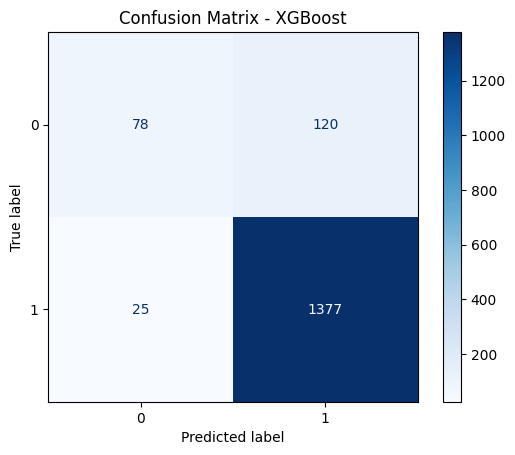

In [ ]:
xgb_params_basic = {
    "n_estimators": [200, 300, 400],  
    "learning_rate": [0.05, 0.1, 0.2], 
    "max_depth": [5, 7, 10], 
    "subsample": [0.8, 1],  
}

xgb_grid_basic = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
                              xgb_params_basic, cv=5, scoring="accuracy", n_jobs=-1)

xgb_grid_basic.fit(X_train_smote, y_train_smote)

best_xgb_basic = xgb_grid_basic.best_estimator_
xgb_predictions_basic = best_xgb_basic.predict(X_test)

# Save 
joblib.dump(best_xgb_basic, "xgboost_model2.pkl")

print("\nXGBoost Results After Number-Based Tuning")
print("Best Parameters:", xgb_grid_basic.best_params_)
print("Accuracy:", accuracy_score(y_test, xgb_predictions_basic))
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions_basic))

ConfusionMatrixDisplay.from_estimator(best_xgb_basic, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()


# Conclusion
Terdapat peningkatan yang kurang signifikan hanya di bagian Precision dan Macro Avg F1-score

# Logistic Regression


Optimized Logistic Regression Results
Best Parameters: {'C': 0.01, 'class_weight': None, 'solver': 'liblinear'}
Accuracy: 0.7525

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.64      0.39       198
           1       0.94      0.77      0.84      1402

    accuracy                           0.75      1600
   macro avg       0.61      0.70      0.62      1600
weighted avg       0.86      0.75      0.79      1600



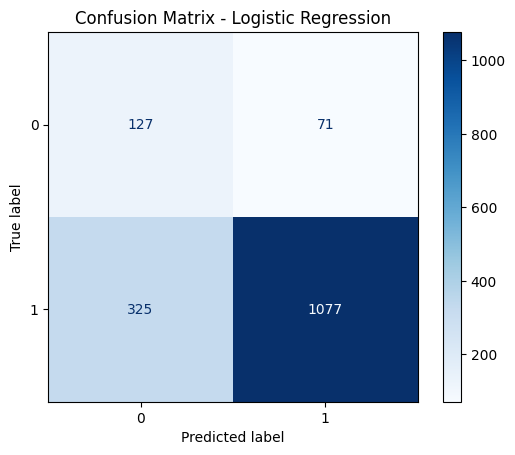

In [ ]:
lr = LogisticRegression(random_state=42, max_iter=1000)


lr_params = {
    "C": [0.01, 0.1, 1, 10, 100], 
    "solver": ["liblinear", "lbfgs"],  
    "class_weight": [None, "balanced"]  
}

lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring="accuracy", n_jobs=-1)
lr_grid.fit(X_train_smote, y_train_smote)
 
best_lr = lr_grid.best_estimator_
lr_predictions = best_lr.predict(X_test)

# Save 
joblib.dump(best_lr, "logistic_regression_model1.pkl")

print("\nOptimized Logistic Regression Results")
print("Best Parameters:", lr_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Logistic Regression 2


Optimized Logistic Regression (Extended Solvers)
Best Parameters: {'C': 0.01, 'class_weight': None, 'solver': 'liblinear'}
Accuracy: 0.7525

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.64      0.39       198
           1       0.94      0.77      0.84      1402

    accuracy                           0.75      1600
   macro avg       0.61      0.70      0.62      1600
weighted avg       0.86      0.75      0.79      1600



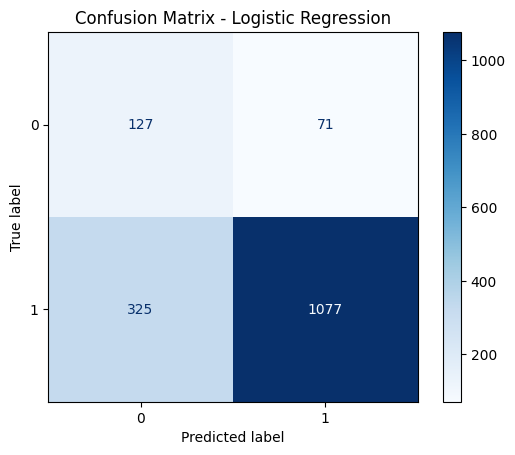

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import joblib

lr_params_extended = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  
    "solver": ["liblinear", "lbfgs", "saga"],  
    "class_weight": [None, "balanced", {0: 2, 1: 1}, {0: 3, 1: 1}] 
}

lr_grid_extended = GridSearchCV(LogisticRegression(random_state=42, max_iter=2000),
                                lr_params_extended, cv=5, scoring="accuracy", n_jobs=-1)

lr_grid_extended.fit(X_train_smote, y_train_smote)

best_lr_extended = lr_grid_extended.best_estimator_
lr_predictions_extended = best_lr_extended.predict(X_test)

# Save 
joblib.dump(best_lr_extended, "logistic_regression_model2.pkl")

print("\nOptimized Logistic Regression (Extended Solvers)")
print("Best Parameters:", lr_grid_extended.best_params_)
print("Accuracy:", accuracy_score(y_test, lr_predictions_extended))
print("\nClassification Report:\n", classification_report(y_test, lr_predictions_extended))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_lr_extended, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


# Model Comparison

C:\Users\Steven\AppData\Local\Temp\ipykernel_10668\2188320277.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="viridis")


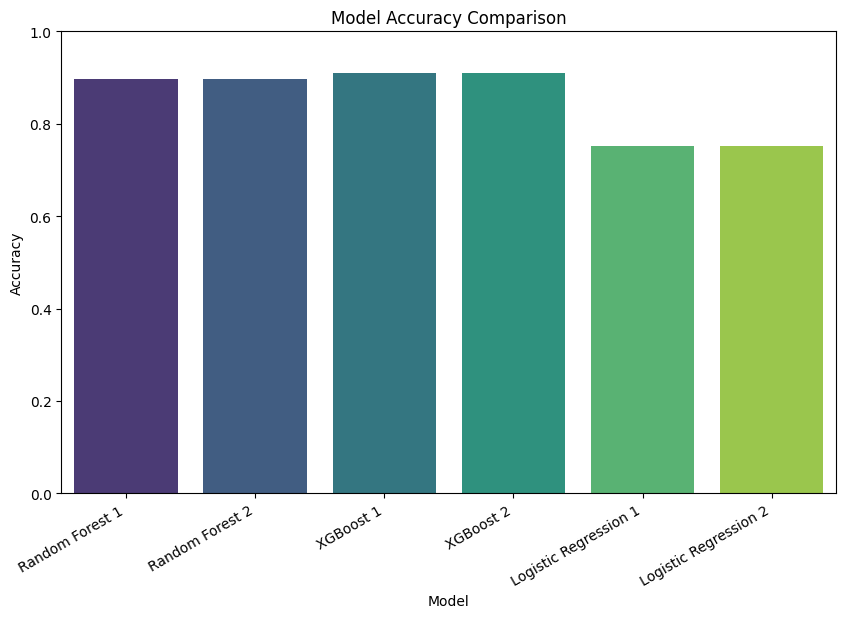

In [ ]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load saved models
best_rf1 = joblib.load("random_forest_model1.pkl")
best_rf2 = joblib.load("random_forest_model2.pkl")
best_xgb1 = joblib.load("xgboost_model1.pkl")
best_xgb2 = joblib.load("xgboost_model2.pkl")
best_lr1 = joblib.load("logistic_regression_model1.pkl")
best_lr2 = joblib.load("logistic_regression_model2.pkl")

rf1_predictions = best_rf1.predict(X_test)
rf2_predictions = best_rf2.predict(X_test)
xgb1_predictions = best_xgb1.predict(X_test)
xgb2_predictions = best_xgb2.predict(X_test)
lr1_predictions = best_lr1.predict(X_test)
lr2_predictions = best_lr2.predict(X_test)

comparison_df = pd.DataFrame({
    "Model": ["Random Forest 1", "Random Forest 2", "XGBoost 1", "XGBoost 2", "Logistic Regression 1", "Logistic Regression 2"],
    "Accuracy": [
        accuracy_score(y_test, rf1_predictions),
        accuracy_score(y_test, rf2_predictions),
        accuracy_score(y_test, xgb1_predictions),
        accuracy_score(y_test, xgb2_predictions),
        accuracy_score(y_test, lr1_predictions),
        accuracy_score(y_test, lr2_predictions)
    ],
    "Precision (Class 0)": [
        precision_score(y_test, rf1_predictions, pos_label=0),
        precision_score(y_test, rf2_predictions, pos_label=0),
        precision_score(y_test, xgb1_predictions, pos_label=0),
        precision_score(y_test, xgb2_predictions, pos_label=0),
        precision_score(y_test, lr1_predictions, pos_label=0),
        precision_score(y_test, lr2_predictions, pos_label=0)
    ],
    "Recall (Class 0)": [
        recall_score(y_test, rf1_predictions, pos_label=0),
        recall_score(y_test, rf2_predictions, pos_label=0),
        recall_score(y_test, xgb1_predictions, pos_label=0),
        recall_score(y_test, xgb2_predictions, pos_label=0),
        recall_score(y_test, lr1_predictions, pos_label=0),
        recall_score(y_test, lr2_predictions, pos_label=0)
    ],
    "F1-Score (Class 0)": [
        f1_score(y_test, rf1_predictions, pos_label=0),
        f1_score(y_test, rf2_predictions, pos_label=0),
        f1_score(y_test, xgb1_predictions, pos_label=0),
        f1_score(y_test, xgb2_predictions, pos_label=0),
        f1_score(y_test, lr1_predictions, pos_label=0),
        f1_score(y_test, lr2_predictions, pos_label=0)
    ],
    "Precision (Class 1)": [
        precision_score(y_test, rf1_predictions, pos_label=1),
        precision_score(y_test, rf2_predictions, pos_label=1),
        precision_score(y_test, xgb1_predictions, pos_label=1),
        precision_score(y_test, xgb2_predictions, pos_label=1),
        precision_score(y_test, lr1_predictions, pos_label=1),
        precision_score(y_test, lr2_predictions, pos_label=1)
    ],
    "Recall (Class 1)": [
        recall_score(y_test, rf1_predictions, pos_label=1),
        recall_score(y_test, rf2_predictions, pos_label=1),
        recall_score(y_test, xgb1_predictions, pos_label=1),
        recall_score(y_test, xgb2_predictions, pos_label=1),
        recall_score(y_test, lr1_predictions, pos_label=1),
        recall_score(y_test, lr2_predictions, pos_label=1)
    ],
    "F1-Score (Class 1)": [
        f1_score(y_test, rf1_predictions, pos_label=1),
        f1_score(y_test, rf2_predictions, pos_label=1),
        f1_score(y_test, xgb1_predictions, pos_label=1),
        f1_score(y_test, xgb2_predictions, pos_label=1),
        f1_score(y_test, lr1_predictions, pos_label=1),
        f1_score(y_test, lr2_predictions, pos_label=1)
    ]
})

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=comparison_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1)
plt.show()


# Konklusi akhir

- XGBoost adalah model terbaik secara keseluruhan, dengan akurasi tertinggi (90,94%) dan keseimbangan terbaik antara presisi dan recall.
- Random Forest memiliki performa yang baik, tetapi recall untuk Kelas 0 (Non-Converters) lebih rendah (maksimum 0,41).
- Logistic Regression memiliki recall tertinggi untuk Kelas 0 (0,64), menandakan model ini baik dalam mendeteksi non-converters..
- Jika mendeteksi non-converters menjadi prioritas, Logistic Regression berguna
- Jika akurasi dan keseimbangan kelas menjadi prioritas, XGBoost adalah pilihan terbaik.
